<a href="https://colab.research.google.com/github/MusaibSyd/Natural-Language-Processing/blob/main/Sentiment_Analysis_Pfizer_Vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this sentiment analysis to know the opinions of the people regarding Pfizer vaccine

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the data from Kaggle

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vaccination_tweets.csv")

In [6]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 899.9+ KB


In [8]:
df.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

Null values will not affect the sentiment analysis. So, I'm keeping the null values 

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,8082.0,1.354990e+18,1.265681e+16,1.337728e+18,1.344901e+18,1.351682e+18,1.364592e+18,1.384788e+18
user_followers,8082.0,3.550042e+04,2.914947e+05,0.000000e+00,1.100000e+02,4.805000e+02,2.089750e+03,1.371493e+07
user_friends,8082.0,1.192207e+03,2.982597e+03,0.000000e+00,1.650000e+02,4.650000e+02,1.249500e+03,1.032260e+05
user_favourites,8082.0,1.513661e+04,4.882913e+04,0.000000e+00,4.172500e+02,2.329000e+03,1.124975e+04,1.166459e+06
retweets,8082.0,1.472037e+00,1.292215e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.780000e+02
favorites,8082.0,8.690671e+00,5.912177e+01,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,2.315000e+03


Preparing the text column to remove any special character

In [10]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stopword = set(stopwords.words('english'))

In [15]:
def clean(text):
  text = str(text).lower()
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)
  return text


In [16]:

df["new_text"] = df["text"].apply(clean)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                8082 non-null   int64 
 1   user_name         8082 non-null   object
 2   user_location     6452 non-null   object
 3   user_description  7576 non-null   object
 4   user_created      8082 non-null   object
 5   user_followers    8082 non-null   int64 
 6   user_friends      8082 non-null   int64 
 7   user_favourites   8082 non-null   int64 
 8   user_verified     8082 non-null   bool  
 9   date              8082 non-null   object
 10  text              8082 non-null   object
 11  hashtags          6133 non-null   object
 12  source            8081 non-null   object
 13  retweets          8082 non-null   int64 
 14  favorites         8082 non-null   int64 
 15  is_retweet        8082 non-null   bool  
 16  new_text          8082 non-null   object
dtypes: bool(2), in

Using word cloud to view the words. Most used words will be represented in large font and the less used words in samll font.

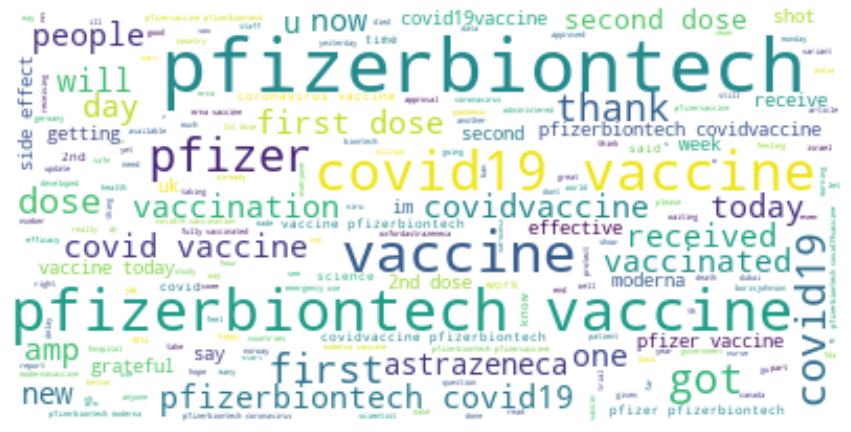

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.new_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Getting the count for verified user from the column user_verified

In [19]:
df['user_verified'].value_counts()

False    7323
True      759
Name: user_verified, dtype: int64

Calculating sentimetn scores of the text column and adding positive, negative and neutral label based on the score

In [20]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
df['scores'] = df['new_text'].apply(lambda new_text: sid.polarity_scores(new_text))


In [24]:
df0 = df[['scores']].iloc[0]
df0.head()

scores    {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...
Name: 0, dtype: object

In [25]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [28]:
df = df[['compound', 'scores', 'new_text']]
df.head()

,compound,scores,new_text
0,0.4019,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",same folks said daikon paste could treat a cyt...
1,-0.1027,"{'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...",while the world has been on the wrong side of ...
2,0.2500,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",coronavirus sputnikv astrazeneca pfizerbiontec...
3,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",facts are immutable senator even when youre no...
4,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",explain to me again why we need a vaccine bori...


In [29]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [30]:
df.head()

,compound,scores,new_text,comp_score
0,0.4019,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",same folks said daikon paste could treat a cyt...,pos
1,-0.1027,"{'neg': 0.13, 'neu': 0.756, 'pos': 0.113, 'com...",while the world has been on the wrong side of ...,neg
2,0.2500,"{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'comp...",coronavirus sputnikv astrazeneca pfizerbiontec...,pos
3,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",facts are immutable senator even when youre no...,pos
4,0.0000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",explain to me again why we need a vaccine bori...,pos


In [31]:
df['comp_score'].value_counts()

pos    6568
neg    1514
Name: comp_score, dtype: int64

Total of postive is more than negative. Therefore, the discussion of the Twitter users was in support of Pfizer vaccine.